# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st


In [3]:

# Study data files
mouse_metadata_path = "resources/Mouse_metadata.csv"
study_results_path = "resources/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
pharma_complete = pd.merge(mouse_metadata, study_results, how= "outer", on = "Mouse ID")

# Display the data table for preview
pharma_complete.head(20)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [4]:
# Checking the number of mice.
len(pharma_complete["Mouse ID"].unique())

249

In [5]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
# Optional: Get all the data for the duplicate mouse ID. 
#I did it all in one, getting the data also shows me the mouse data which is duplcated
find_duplicate = pharma_complete.groupby(["Mouse ID","Timepoint"])["Mouse ID"].transform('size') > 1
duplicate = pharma_complete[find_duplicate]
duplicate

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
#This actually drops the duplicates only, but the instructions I think want us to drop the whole mouse ID
# pharma_clean = pharma_complete.drop_duplicates(subset=["Mouse ID","Timepoint"])

#This removes the entire g989 mouse records
pharma_clean = pharma_complete[pharma_complete["Mouse ID"] != 'g989']

In [7]:
# Checking the number of mice in the clean DataFrame.
len(pharma_clean["Mouse ID"].unique())


248

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
pharma_by_drug = pharma_clean.groupby("Drug Regimen")


# mean, median, variance, standard deviation, and SEM of the tumor volume. 
tumor_mean = pharma_by_drug["Tumor Volume (mm3)"].mean().rename("Tumor Volume Mean")
tumor_md = pharma_by_drug["Tumor Volume (mm3)"].median().rename("Tumor Volume Median")
tumor_var = pharma_by_drug["Tumor Volume (mm3)"].var().rename("Tumor Volume Variance")
tumor_std = pharma_by_drug["Tumor Volume (mm3)"].std().rename("Tumor Volume StDev")
tumor_sem = pharma_by_drug["Tumor Volume (mm3)"].sem().rename("Tumor Volume SEM")

# Assemble the resulting series into a single summary DataFrame.
tumor_summary_df = pd.merge(tumor_mean, tumor_md, left_index=True, right_index=True)
tumor_summary_df = pd.merge(tumor_summary_df, tumor_var,left_index=True, right_index=True)
tumor_summary_df = pd.merge(tumor_summary_df, tumor_std,left_index=True, right_index=True)
tumor_summary_df = pd.merge(tumor_summary_df, tumor_sem,left_index=True, right_index=True)


tumor_summary_df


,Tumor Volume Mean,Tumor Volume Median,Tumor Volume Variance,Tumor Volume StDev,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line.
tumorVol_summary = pharma_by_drug["Tumor Volume (mm3)"].agg(['mean', 'median', 'var', 'std', 'sem'])
tumorVol_summary

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

<AxesSubplot:title={'center':'Number of Mice Tested per Drug'}, xlabel='Drug Regimen', ylabel='Number of Mice Tested'>

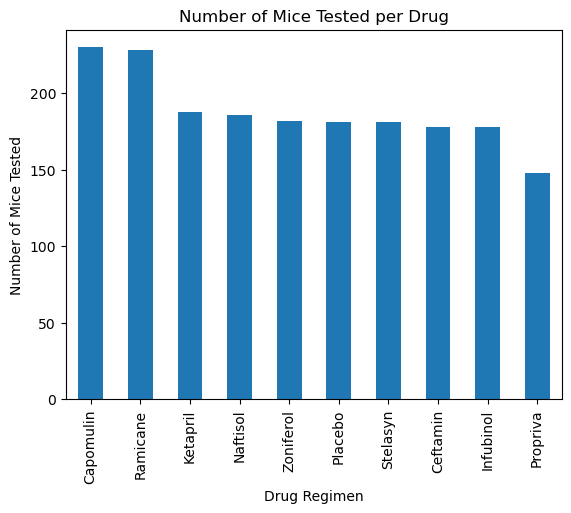

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
number_of_mice = pharma_by_drug["Mouse ID"].count()
number_of_mice.sort_values(ascending=False, inplace=True) #sort by values so that it looks the same as the given chart

plot_mice_by_drug_pd = number_of_mice.plot(kind="bar", title = "Number of Mice Tested per Drug", ylabel = "Number of Mice Tested")
plot_mice_by_drug_pd


Text(0, 0.5, 'Number of Mice Tested')

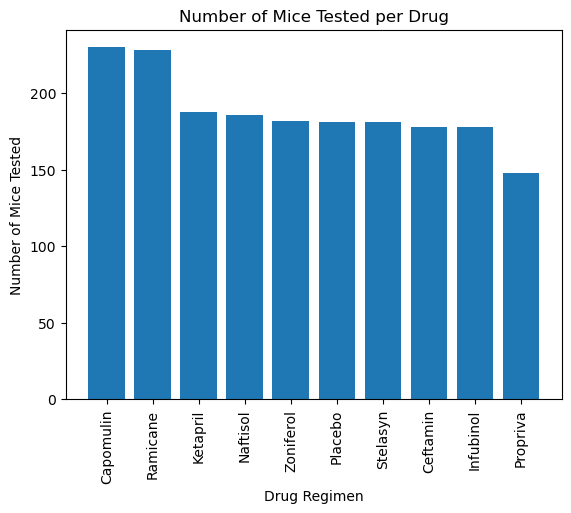

In [11]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
# number_of_mice = pharma_by_drug["Mouse ID"].count() - just a reminder of what the number of mice values are

drug_names = number_of_mice.keys()

plt.bar(drug_names, number_of_mice)
plt.xticks(drug_names, rotation = "vertical")
plt.title("Number of Mice Tested per Drug")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")

<AxesSubplot:title={'center':'Mouse Sex Distribution'}>

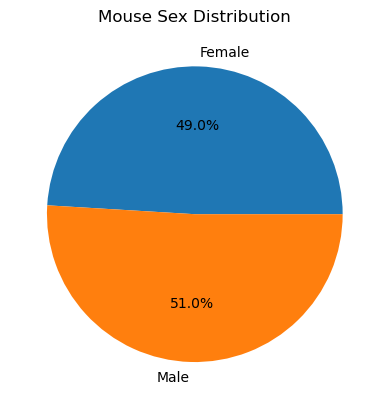

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
mouse_by_sex = pharma_clean.groupby('Sex')
sex_count = mouse_by_sex['Mouse ID'].count()
sex_count_pie = sex_count.plot(kind="pie", title = "Mouse Sex Distribution", autopct = '%1.1f%%' , ylabel= "")
sex_count_pie


Text(0.5, 1.0, 'Mouse Sex Distribution')

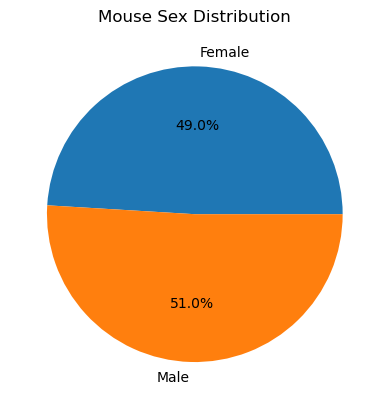

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex = sex_count.keys()
plt.pie(sex_count, labels=sex, autopct="%1.1f%%")
plt.title("Mouse Sex Distribution")

## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
pharma_short = pharma_clean[(pharma_clean['Drug Regimen'] == 'Capomulin')|(pharma_clean['Drug Regimen'] == 'Ramicane')| (pharma_clean['Drug Regimen'] =='Infubinol') | (pharma_clean['Drug Regimen'] =='Ceftamin')]
pharma_short['Drug Regimen'].unique()

array(['Ramicane', 'Capomulin', 'Infubinol', 'Ceftamin'], dtype=object)

In [15]:
# Start by getting the last (greatest) timepoint for each mouse
pharma_by_mouse = pharma_short.groupby("Mouse ID")
max_timepoints = pharma_by_mouse['Timepoint'].max()
max_timepoints


Mouse ID
a203    45
a251    45
a275    45
a411    45
a444    45
        ..
y769    45
y793    45
y865    45
z578    45
z581    45
Name: Timepoint, Length: 100, dtype: int64

In [16]:

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_pharma = pd.merge(max_timepoints, pharma_short, on=['Mouse ID', "Timepoint"], how = 'inner')
final_pharma

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a275,45,Ceftamin,Female,20,28,62.999356,3
3,a411,45,Ramicane,Male,3,22,38.407618,1
4,a444,45,Ramicane,Female,10,25,43.047543,0
...,...,...,...,...,...,...,...,...
95,y769,45,Ceftamin,Female,6,27,68.594745,4
96,y793,45,Capomulin,Male,17,17,31.896238,2
97,y865,45,Ceftamin,Male,23,26,64.729837,3
98,z578,45,Ramicane,Male,11,16,30.638696,0


In [17]:
# Put treatments into a list for for loop (and later for plot labels)
drug_list = final_pharma['Drug Regimen'].unique().tolist()
drug_list

['Infubinol', 'Ceftamin', 'Ramicane', 'Capomulin']

In [18]:

# Create empty list to fill with tumor vol data (for plotting)
#could I not do this same thing with a .loc function? like in the vehicles 
#assignment in 5.3? Would love to know what the goal is in doing it 
#this way instead of that way?

Ramicane_final_vol = final_pharma.loc[(final_pharma['Drug Regimen'] == "Ramicane"),"Tumor Volume (mm3)"]
Ramicane_final_vol_list = Ramicane_final_vol.tolist()

Capomulin_final_vol = final_pharma.loc[(final_pharma['Drug Regimen'] == "Capomulin"),"Tumor Volume (mm3)"]
Capomulin_final_vol_list =Capomulin_final_vol.tolist()

Infubinol_final_vol = final_pharma.loc[(final_pharma['Drug Regimen'] == "Infubinol"),"Tumor Volume (mm3)"]
Infubinol_final_vol_list = Infubinol_final_vol.tolist()

Ceftamin_final_vol = final_pharma.loc[(final_pharma['Drug Regimen'] == "Ceftamin"),"Tumor Volume (mm3)"]
Ceftamin_final_vol_list = Ceftamin_final_vol.tolist()


In [31]:

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
#Ramicane outlier test
ram_lowerq = Ramicane_final_vol.quantile(0.25)
ram_upperq = Ramicane_final_vol.quantile(0.75)
ram_iqr = ram_upperq - ram_lowerq
ram_lower_bound = ram_lowerq - (1.5*ram_iqr)
ram_upper_bound = ram_upperq + (1.5*ram_iqr)

for vol in Ramicane_final_vol.tolist():
    if (vol > ram_upper_bound) | (vol < ram_lower_bound):  
        print(f"{vol} is an outlier for Ramicane")

#capomulin outlier test
cap_lowerq = Capomulin_final_vol.quantile(0.25)
cap_upperq = Capomulin_final_vol.quantile(0.75)
cap_iqr = cap_upperq - cap_lowerq
cap_lower_bound = cap_lowerq - (1.5*cap_iqr)
cap_upper_bound = cap_upperq + (1.5*cap_iqr)

for vol in Capomulin_final_vol.tolist():
    if (vol > cap_upper_bound) | (vol < cap_lower_bound):  
        print(f"{vol} is an outlier for Capomulin")


#Infubinol outlier test
inf_lowerq = Infubinol_final_vol.quantile(0.25)
inf_upperq = Infubinol_final_vol.quantile(0.75)
inf_iqr = inf_upperq - inf_lowerq
inf_lower_bound = inf_lowerq - (1.5*cap_iqr)
inf_upper_bound = inf_upperq + (1.5*cap_iqr)

for vol in Infubinol_final_vol.tolist():
    if (vol > inf_upper_bound) | (vol < inf_lower_bound):  
        print(f"{vol} is an outlier for Infubinol")


#Ceftamin outlier test
cef_lowerq = Ceftamin_final_vol.quantile(0.25)
cef_upperq = Ceftamin_final_vol.quantile(0.75)
cef_iqr = cef_upperq - cef_lowerq
cef_lower_bound = cef_lowerq - (1.5*cap_iqr)
cef_upper_bound = cef_upperq + (1.5*cap_iqr)

for vol in Ceftamin_final_vol.tolist():
    if (vol > cef_upper_bound) | (vol < cef_lower_bound):  
        print(f"{vol} is an outlier for Ceftamin")

    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

36.3213458 is an outlier for Infubinol


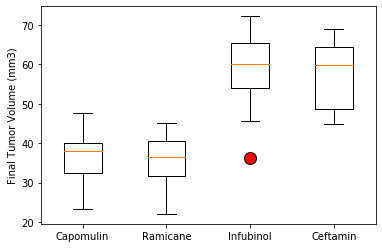

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.



## Line and Scatter Plots

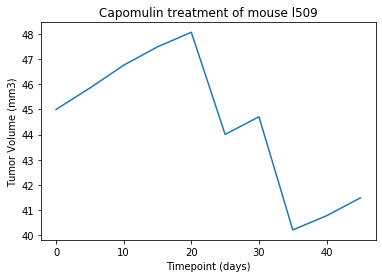

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin



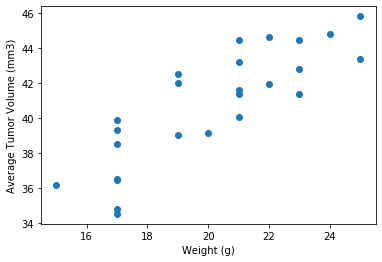

In [17]:
# Generate a scatter plot of average tumor volume vs mouse weight for the Capomulin regimen



## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


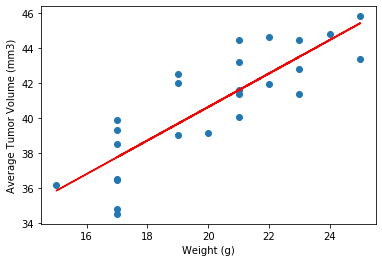

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

